Libaries

In [802]:
import pandas as pd
import numpy as np
from numpy import cov
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error    
from PIL import Image


Read the csv file

In [803]:
df =  pd.read_csv(r"data/fifa_cleaned.csv")
df

c:\Users\yarin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,2/5/1985,34,187.96,83.0,"ST,LW",Portugal,94,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,Neymar Jr,Neymar da Silva Santos Junior,2/5/1992,27,175.26,68.0,"LW,CAM",Brazil,92,...,66+3,60+3,60+3,60+3,66+3,61+3,47+3,47+3,47+3,61+3
3,176580,L. Suárez,Luis Alberto Suárez Díaz,1/24/1987,32,182.88,86.2,ST,Uruguay,91,...,69+5,68+5,68+5,68+5,69+5,66+5,63+5,63+5,63+5,66+5
4,177003,L. Modrić,Luka Modrić,9/9/1985,33,172.72,66.2,CM,Croatia,91,...,83+3,82+3,82+3,82+3,83+3,80+3,72+3,72+3,72+3,80+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,243165,N. Christoffersson,Noah Christoffersson,5/11/1999,19,190.50,77.1,ST,Sweden,47,...,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
17950,246758,J. Tauriainen,Julius Tauriainen,4/18/2001,17,175.26,68.0,"CAM,CM",Finland,47,...,44+2,44+2,44+2,44+2,44+2,43+2,42+2,42+2,42+2,43+2
17951,241828,L. Offord,Luke Offord,11/19/1999,19,170.18,66.2,RB,England,47,...,44+2,40+2,40+2,40+2,44+2,45+2,44+2,44+2,44+2,45+2
17952,243413,D. Walsh,Darryl Walsh,6/14/2000,18,185.42,76.2,"CB,LB",Republic of Ireland,47,...,39+2,38+2,38+2,38+2,39+2,42+2,46+2,46+2,46+2,42+2


Descriptive statistics data 

In [804]:
df.describe()


,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,215411.087780,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,29758.387106,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,16.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201117.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,222919.000000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,237613.500000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,247607.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


Return the number of unique values for each column

In [805]:
df.positions.nunique()

890

Duplicated checking

In [806]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17949    False
17950    False
17951    False
17952    False
17953    False
Length: 17954, dtype: bool

 Remove the unrelevate columns

In [807]:

df=df.drop(['id','full_name','birth_date','nationality','wage_euro','preferred_foot','weak_foot(1-5)','skill_moves(1-5)','work_rate','body_type','release_clause_euro'],axis=1)

df=df.drop(['club_position','club_jersey_number','club_join_date','contract_end_year','national_team','national_rating','national_team_position','national_jersey_number'],axis=1)

df=df.drop(['tags','traits','LS','ST','RS','LW','LF','CF','RF','RW','LAM'],axis=1)

df=df.drop(['CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','LCB','CB','RCB','RB'],axis=1)

Remove the players who play in Leagues with low level Reputation (under 3) 

In [808]:
df = df.drop(df[df['international_reputation(1-5)'] < 3].index)

Number of not unique positions after cleaning that data

In [809]:
df.positions.nunique()

108

Remove the players who play in clubs with under 80 Rating (scale of clubs rating: 54-86)

In [810]:
df = df.drop(df[df['club_rating'] < 80].index)

Remove the players under 80 Rating (scale of players rarting: 48-94)

In [811]:
df = df.drop(df[df['overall_rating'] < 80].index)


Current dataframe

In [812]:
df

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,L. Messi,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,5,FC Barcelona,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187.96,83.0,"ST,LW",94,94,77000000.0,5,Juventus,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,27,175.26,68.0,"LW,CAM",92,92,108000000.0,5,Paris Saint-Germain,...,81,94,27,24,33,9,9,15,15,11
3,L. Suárez,32,182.88,86.2,ST,91,91,80000000.0,5,FC Barcelona,...,85,85,62,45,38,27,25,31,33,37
4,L. Modrić,33,172.72,66.2,CM,91,91,67000000.0,4,Real Madrid,...,82,90,68,76,73,13,9,7,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,K. Gameiro,31,172.72,69.9,ST,80,80,13500000.0,3,Valencia CF,...,81,80,50,33,39,6,10,8,8,6
439,D. Perotti,30,152.40,69.9,LW,80,80,14500000.0,3,Roma,...,90,81,58,31,22,5,8,14,6,8
440,M. Musacchio,28,154.94,73.0,CB,80,80,12500000.0,3,Milan,...,57,76,84,84,80,5,11,12,6,12
441,R. Rodríguez,26,154.94,77.1,"LB,CB",80,83,15500000.0,3,Milan,...,83,80,80,78,78,14,13,14,14,11


Present club names


In [813]:
teams = df.club_team.unique()
teams

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Real Madrid',
       'Manchester City', 'Chelsea', 'Manchester United',
       'FC Bayern München', 'Atlético Madrid', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Inter', 'Arsenal', 'Borussia Dortmund',
       'Lazio', 'FC Porto', 'Roma', 'Sevilla FC', 'Real Betis',
       'Bayer 04 Leverkusen', 'Milan', 'Valencia CF'], dtype=object)

In [814]:
Spain_Teams = []
England_Teams = []
Italy_Teams = []
France_Teams = []
Germany_Teams = []



Sort teams by top 5 leagues in Europe

In [815]:
for i in teams: 
    if i == 'FC Barcelona' or i =='Real Madrid' or i == 'Atlético Madrid' or i == 'Sevilla FC' or i == 'Real Betis' or i == 'Valencia CF':
        Spain_Teams.append(i)
    if i == 'Juventus' or i == 'Napoli' or i == 'Inter' or i == 'Milan' or i == 'Lazio':
        Italy_Teams.append(i)
    if i == 'Manchester City' or i == 'Chelsea' or i == 'Manchester United' or i == 'Tottenham Hotspur' or i == 'Liverpool' or i == 'Arsenal':
        England_Teams.append(i)
    if i == 'Paris Saint-Germain':
        France_Teams.append(i)
    if i == 'FC Bayern München' or i == 'Borussia Dortmund' or i == 'Bayer 04 Leverkusen':
        Germany_Teams.append(i)
    

The most popular teams which every league

In [816]:
print("The most popular teams in Spain: ", Spain_Teams)
print("The most popular teams in Italy: ", Italy_Teams)
print("The most popular teams in England: ", England_Teams)
print("The most popular teams in Germany: ", Germany_Teams)
print("The most popular teams in France: ", France_Teams)
print('\n')
print("The most popular teams in Europe: \n", teams)
len(teams)

The most popular teams in Spain:  ['FC Barcelona', 'Real Madrid', 'Atlético Madrid', 'Sevilla FC', 'Real Betis', 'Valencia CF']
The most popular teams in Italy:  ['Juventus', 'Napoli', 'Inter', 'Lazio', 'Milan']
The most popular teams in England:  ['Manchester City', 'Chelsea', 'Manchester United', 'Tottenham Hotspur', 'Liverpool', 'Arsenal']
The most popular teams in Germany:  ['FC Bayern München', 'Borussia Dortmund', 'Bayer 04 Leverkusen']
The most popular teams in France:  ['Paris Saint-Germain']


The most popular teams in Europe: 
 ['FC Barcelona' 'Juventus' 'Paris Saint-Germain' 'Real Madrid'
 'Manchester City' 'Chelsea' 'Manchester United' 'FC Bayern München'
 'Atlético Madrid' 'Tottenham Hotspur' 'Liverpool' 'Napoli' 'Inter'
 'Arsenal' 'Borussia Dortmund' 'Lazio' 'FC Porto' 'Roma' 'Sevilla FC'
 'Real Betis' 'Bayer 04 Leverkusen' 'Milan' 'Valencia CF']


23

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Number of teams which every league'}>

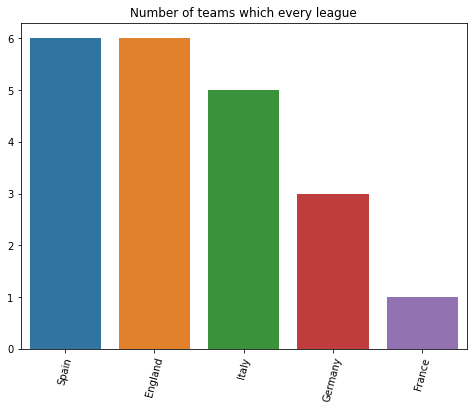

In [817]:
Leauges= ['Spain','England','Italy','Germany','France']
Num_Of_Teams = [len(Spain_Teams),len(England_Teams),len(Italy_Teams),len(Germany_Teams),len(France_Teams)]
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.title("Number of teams which every league")
sns.barplot(Leauges, Num_Of_Teams)

Sort teams by overall rating

In [818]:
df.drop(df[df["club_team"] == 'FC Porto'].index,inplace = True)
df = df.sort_values(by = ['club_rating'],ascending=False)
top_clubs = df[['club_team','club_rating']]
top_clubs = top_clubs.drop_duplicates(['club_team'])
top_clubs

,club_team,club_rating
0,FC Barcelona,86.0
108,Real Madrid,86.0
62,FC Bayern München,85.0
66,Juventus,85.0
79,Manchester City,85.0
87,Atlético Madrid,84.0
31,Paris Saint-Germain,84.0
121,Liverpool,83.0
15,Tottenham Hotspur,83.0
172,Chelsea,83.0


Overall rating graph of top teams in top 5 Europe leagues


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top Teams In Europe'}, xlabel='club_team', ylabel='club_rating'>

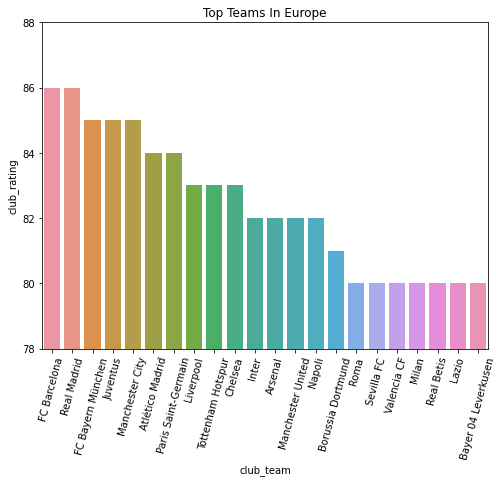

In [819]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.ylim(78,88)
plt.title("Top Teams In Europe")
Rating = top_clubs['club_rating']
Clubs = top_clubs['club_team']

sns.barplot(Clubs,Rating)

Describe playres age


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '20'),
  Text(1, 0, '21'),
  Text(2, 0, '22'),
  Text(3, 0, '23'),
  Text(4, 0, '24'),
  Text(5, 0, '25'),
  Text(6, 0, '26'),
  Text(7, 0, '27'),
  Text(8, 0, '28'),
  Text(9, 0, '29'),
  Text(10, 0, '30'),
  Text(11, 0, '31'),
  Text(12, 0, '32'),
  Text(13, 0, '33'),
  Text(14, 0, '34'),
  Text(15, 0, '35'),
  Text(16, 0, '36'),
  Text(17, 0, '37'),
  Text(18, 0, '41')])

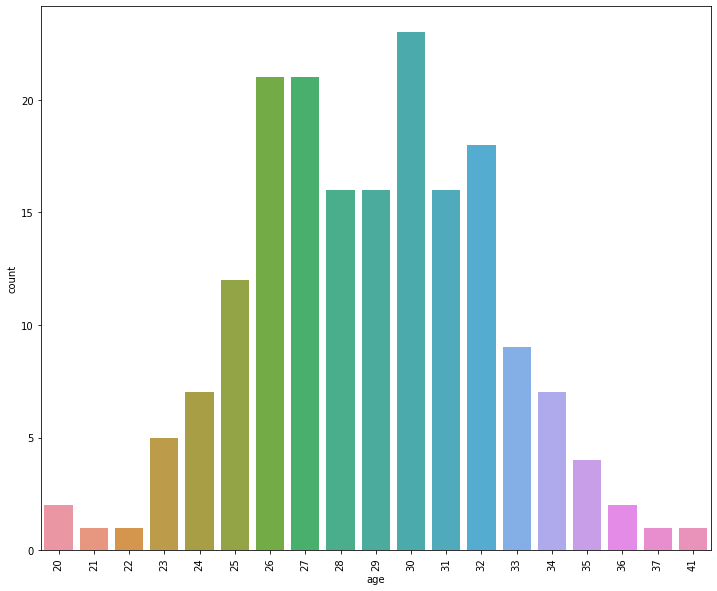

In [820]:
plt.figure(figsize=(12, 10))
sns.countplot(x=df.age)
plt.xticks(rotation=90)

Sort players by overall rating


In [821]:
df = df.sort_values(by=['overall_rating'], ascending=False)

In [822]:
df

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,L. Messi,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,5,FC Barcelona,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187.96,83.0,"ST,LW",94,94,77000000.0,5,Juventus,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,27,175.26,68.0,"LW,CAM",92,92,108000000.0,5,Paris Saint-Germain,...,81,94,27,24,33,9,9,15,15,11
3,L. Suárez,32,182.88,86.2,ST,91,91,80000000.0,5,FC Barcelona,...,85,85,62,45,38,27,25,31,33,37
7,De Gea,28,193.04,76.2,GK,91,93,72000000.0,4,Manchester United,...,40,70,25,21,13,90,85,85,89,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,K. Gameiro,31,172.72,69.9,ST,80,80,13500000.0,3,Valencia CF,...,81,80,50,33,39,6,10,8,8,6
437,Marcano,31,187.96,77.1,CB,80,80,10000000.0,3,Roma,...,45,72,82,81,78,8,16,7,14,16
435,J. Weigl,23,185.42,72.1,"CDM,CB",80,84,16500000.0,3,Borussia Dortmund,...,52,81,78,79,76,6,14,16,11,7
434,O. Toprak,29,185.42,83.0,CB,80,81,13500000.0,3,Borussia Dortmund,...,43,78,82,83,83,11,8,11,12,15


Describe players position


In [823]:
df.positions.unique()

array(['CF,RW,ST', 'ST,LW', 'LW,CAM', 'ST', 'GK', 'LW,CF', 'CAM,CM', 'CM',
       'CB', 'CDM,CM', 'CF,ST', 'CAM,RW', 'RW,ST', 'RW,LW,ST',
       'CAM,RM,CM', 'RW,ST,RM', 'LW,RW,CM', 'ST,LM', 'CAM,LM,ST',
       'CM,CAM', 'LW,ST', 'CAM,CM,LW', 'CM,CDM', 'LB', 'CAM,CM,RM', 'CDM',
       'CM,CAM,CDM', 'RW,LW', 'LW,RW,LM', 'RB,CB', 'CF,ST,CAM',
       'RB,CM,CDM', 'LB,LM', 'CAM,RM,RW,CF', 'CAM', 'LM', 'LM,RW,LW',
       'LM,ST', 'LM,CM,RM', 'CB,CDM', 'RW,RM', 'RB', 'CM,LM,RM', 'RM,RW',
       'LW,LM', 'LW,ST,LM', 'LW,RW', 'LB,CB', 'CDM,CB', 'RB,RM,CM',
       'CM,LW,LM,CAM', 'LM,CAM,RM', 'LM,LW', 'RM,LM,ST', 'CDM,RB,CM',
       'RW,CF', 'CM,LW', 'RB,RW,LW', 'RM', 'CM,CDM,CAM', 'RW,RM,CAM',
       'RB,CM', 'CM,LM', 'RM,RW,CAM', 'CM,LW,RW', 'LW', 'CM,ST,CAM,CF',
       'LM,LB,CM', 'CF,CAM', 'LB,LWB', 'CAM,LW,CM,RM', 'CAM,CDM',
       'RB,RWB'], dtype=object)

Goalkeeprs dataframe

In [824]:
gk_df = df[(df.positions == 'GK') ]
gk_df

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
7,De Gea,28,193.04,76.2,GK,91,93,72000000.0,4,Manchester United,...,40,70,25,21,13,90,85,85,89,94
14,J. Oblak,26,187.96,87.1,GK,90,93,68000000.0,3,Atlético Madrid,...,11,70,27,12,18,86,92,78,88,89
18,M. ter Stegen,26,187.96,84.8,GK,89,92,58000000.0,3,FC Barcelona,...,25,70,25,13,10,87,85,88,86,90
19,M. Neuer,32,193.04,92.1,GK,89,89,38000000.0,5,FC Bayern München,...,47,70,17,10,11,90,86,91,87,87
17,T. Courtois,26,198.12,96.2,GK,89,90,53500000.0,4,Real Madrid,...,27,66,20,18,16,85,91,72,86,88
33,H. Lloris,32,187.96,82.1,GK,88,88,36000000.0,4,Tottenham Hotspur,...,40,65,29,10,18,88,84,68,83,92
30,G. Buffon,41,193.04,92.1,GK,88,88,4000000.0,4,Paris Saint-Germain,...,22,70,13,11,11,84,87,74,90,85
39,S. Handanovič,34,193.04,92.1,GK,88,88,30000000.0,3,Inter,...,23,69,25,10,13,87,86,69,89,89
45,K. Navas,32,185.42,79.8,GK,87,87,30500000.0,3,Real Madrid,...,25,67,28,14,14,90,81,75,82,90
56,Alisson,26,190.50,91.2,GK,87,91,46000000.0,3,Liverpool,...,23,65,15,19,16,84,82,87,87,89


Top 10 Goalkeepers by overall rating


In [825]:
top_10_gk = gk_df.head(10)
top_10_gk

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
7,De Gea,28,193.04,76.2,GK,91,93,72000000.0,4,Manchester United,...,40,70,25,21,13,90,85,85,89,94
14,J. Oblak,26,187.96,87.1,GK,90,93,68000000.0,3,Atlético Madrid,...,11,70,27,12,18,86,92,78,88,89
18,M. ter Stegen,26,187.96,84.8,GK,89,92,58000000.0,3,FC Barcelona,...,25,70,25,13,10,87,85,88,86,90
19,M. Neuer,32,193.04,92.1,GK,89,89,38000000.0,5,FC Bayern München,...,47,70,17,10,11,90,86,91,87,87
17,T. Courtois,26,198.12,96.2,GK,89,90,53500000.0,4,Real Madrid,...,27,66,20,18,16,85,91,72,86,88
33,H. Lloris,32,187.96,82.1,GK,88,88,36000000.0,4,Tottenham Hotspur,...,40,65,29,10,18,88,84,68,83,92
30,G. Buffon,41,193.04,92.1,GK,88,88,4000000.0,4,Paris Saint-Germain,...,22,70,13,11,11,84,87,74,90,85
39,S. Handanovič,34,193.04,92.1,GK,88,88,30000000.0,3,Inter,...,23,69,25,10,13,87,86,69,89,89
45,K. Navas,32,185.42,79.8,GK,87,87,30500000.0,3,Real Madrid,...,25,67,28,14,14,90,81,75,82,90
56,Alisson,26,190.50,91.2,GK,87,91,46000000.0,3,Liverpool,...,23,65,15,19,16,84,82,87,87,89


Goalkeepers overall rating graph


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'GK Overall Rating'}, xlabel='name', ylabel='overall_rating'>

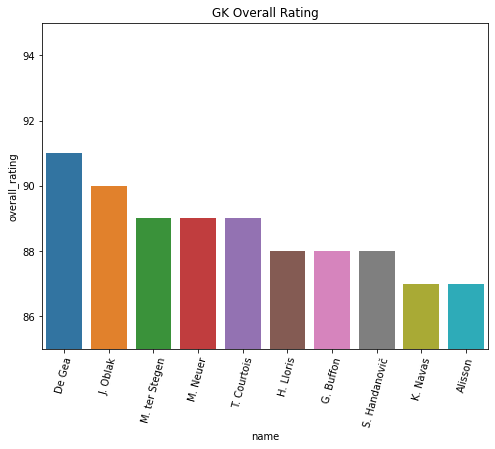

In [826]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.ylim(85,95)
plt.title("GK Overall Rating")
sns.barplot(top_10_gk['name'], top_10_gk['overall_rating'])

Scatterplot Distribution by Rating, Age, Weight and Height

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Overall Rating vs Age vs Weight vs Height'}, xlabel='age', ylabel='overall_rating'>

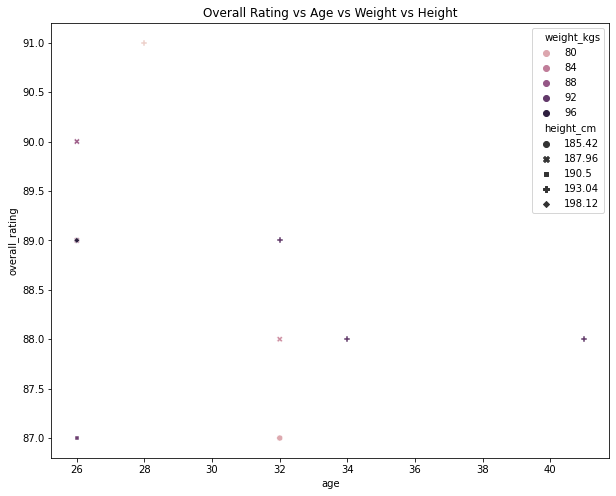

In [827]:
plt.figure(figsize=(10,8))
plt.title('Overall Rating vs Age vs Weight vs Height')

sns.scatterplot(top_10_gk.age, top_10_gk.overall_rating,top_10_gk.weight_kgs,top_10_gk.height_cm)

Defender positions

In [828]:
defenders_df = df[(df.positions == 'CB') |
                  (df.positions == 'LB') |
                  (df.positions == 'RB,CB') |
                  (df.positions == 'RB,CM,CDM') |
                  (df.positions == 'LB,LM') |
                  (df.positions == 'RB') |
                  (df.positions == 'CB,CDM') | 
                  (df.positions == 'LB,CB') |
                  (df.positions == 'RB,RM,CM') |
                  (df.positions == 'RB,RW,LW') |
                  (df.positions == 'RB,CM') |
                  (df.positions == 'LB,LWB') |
                  (df.positions == 'RB,RWB')
                         ]

Top 10 defenders by overall rating

In [829]:
top_10_defenders = defenders_df.head(10)
top_10_defenders

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
13,D. Godín,33,187.96,78.0,CB,90,90,44000000.0,3,Atlético Madrid,...,50,82,90,89,89,6,8,15,5,15
10,G. Chiellini,34,187.96,84.8,CB,90,90,31000000.0,4,Juventus,...,50,84,94,93,90,3,3,2,4,3
8,Sergio Ramos,32,182.88,82.1,CB,90,90,44000000.0,4,Real Madrid,...,82,84,87,89,90,11,8,9,7,11
26,Piqué,32,193.04,84.8,CB,88,88,40000000.0,4,FC Barcelona,...,69,89,91,87,85,10,11,14,15,8
29,M. Hummels,30,190.50,92.1,CB,88,88,46000000.0,4,FC Bayern München,...,68,91,88,90,88,15,6,10,5,6
31,Thiago Silva,34,182.88,82.1,CB,88,88,24000000.0,4,Paris Saint-Germain,...,60,86,88,89,85,9,12,5,9,10
35,V. van Dijk,27,193.04,92.1,CB,88,90,59500000.0,3,Liverpool,...,62,87,90,89,84,13,10,13,11,11
38,K. Koulibaly,27,187.96,88.9,CB,88,91,60000000.0,3,Napoli,...,33,80,91,88,87,7,11,7,13,5
43,Marcelo,30,175.26,79.8,LB,87,87,36500000.0,4,Real Madrid,...,59,86,71,82,83,12,5,5,5,9
48,S. Umtiti,25,182.88,74.8,CB,87,92,57000000.0,3,FC Barcelona,...,61,82,90,89,86,15,10,14,12,15


Defenders overall rating graph


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Defenders Overall Rating'}, xlabel='name', ylabel='overall_rating'>

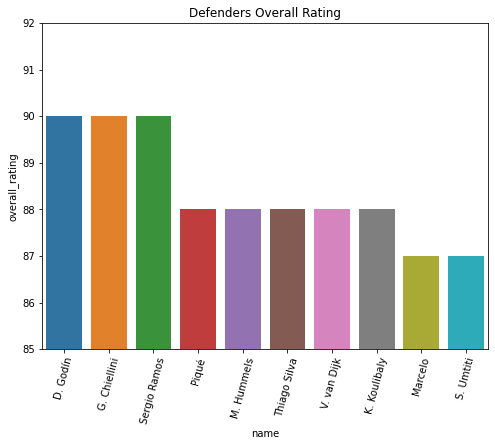

In [830]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.ylim(85,92)
plt.title("Defenders Overall Rating")
sns.barplot(top_10_defenders['name'], top_10_defenders['overall_rating'])

Scatterplot distribution by Rating, Age, Weight and Height


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Overall Rating vs Age vs Weight vs Height'}, xlabel='age', ylabel='overall_rating'>

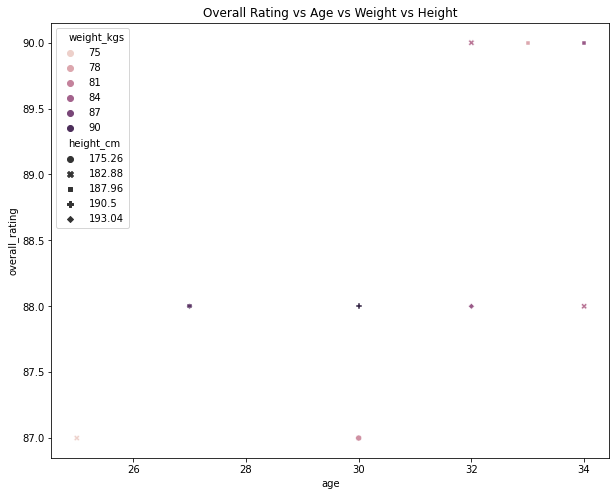

In [831]:
plt.figure(figsize=(10,8))
plt.title('Overall Rating vs Age vs Weight vs Height')

sns.scatterplot(top_10_defenders.age, top_10_defenders.overall_rating,top_10_defenders.weight_kgs,top_10_defenders.height_cm)

Midfielder positions


In [832]:
midfielders_df = df[(df.positions == 'CAM,CM') |
                    (df.positions == 'CM') |
                    (df.positions == 'CDM,CM') |
                    (df.positions == 'CAM,RW') |
                    (df.positions == 'CAM,RM,CM') |
                    (df.positions == 'CAM,LM,ST') |
                    (df.positions == 'CM,CAM') |
                    (df.positions == 'CDM') | 
                    (df.positions == 'CAM,CM,RM') |
                    (df.positions == 'CM,CDM') |
                    (df.positions == 'CM,CAM,CDM') |
                    (df.positions == 'CAM,CM,LW') |
                    (df.positions == 'CAM,RM,RW,CF') |
                    (df.positions == 'LM,ST') | 
                    (df.positions == 'CAM') |
                    (df.positions == 'LM,RW,LW') |
                    (df.positions == 'LM') |
                    (df.positions == 'CM,LM,RM') |
                    (df.positions == 'LM,CM,RM') |
                    (df.positions == 'RM,RW') |
                    (df.positions == 'RM,LM,ST') |
                    (df.positions == 'LM,LW') |
                    (df.positions == 'CM,LW,LM,CAM') |
                    (df.positions == 'CDM,CB') |
                    (df.positions == 'LM,CAM,RM') |
                    (df.positions == 'CDM,RB,CM') |
                    (df.positions == 'RM') |
                    (df.positions == 'CM,LW') |
                    (df.positions == 'CM,LM') | 
                    (df.positions == 'RM,RW,CAM') |
                    (df.positions == 'CM,LW,RW') |
                    (df.positions == 'CM,ST,CAM,CF') |
                    (df.positions == 'CAM,LW,CM,RM') |
                    (df.positions == 'LM,LB,CM') |
                    (df.positions == 'CAM,CDM')
                           ]
                 

Top 10 midfielders by overall rating

In [833]:
top_10_midfielders = midfielders_df.head(10)
top_10_midfielders

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
5,K. De Bruyne,27,154.94,69.9,"CAM,CM",91,92,102000000.0,4,Manchester City,...,79,90,68,58,51,15,13,5,10,13
4,L. Modrić,33,172.72,66.2,CM,91,91,67000000.0,4,Real Madrid,...,82,90,68,76,73,13,9,7,14,9
11,David Silva,33,172.72,67.1,"CAM,CM",90,90,60000000.0,4,Manchester City,...,75,93,59,53,29,6,15,7,6,12
9,T. Kroos,29,182.88,76.2,CM,90,90,76500000.0,4,Real Madrid,...,73,88,72,74,66,10,11,13,7,10
25,N. Kanté,27,167.64,72.1,"CDM,CM",89,90,63000000.0,3,Chelsea,...,54,85,90,91,85,15,12,10,7,10
21,P. Dybala,25,152.40,74.8,"CAM,RW",89,94,89000000.0,3,Juventus,...,86,84,23,20,20,5,4,4,5,8
16,Sergio Busquets,30,187.96,76.2,"CDM,CM",89,89,51500000.0,4,FC Barcelona,...,60,93,90,86,80,5,8,13,9,13
34,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",88,89,69500000.0,3,Tottenham Hotspur,...,67,88,59,57,22,9,14,7,7,6
41,M. Reus,29,154.94,71.2,"CAM,LM,ST",88,88,58000000.0,4,Borussia Dortmund,...,89,85,49,36,45,12,12,13,13,11
36,P. Pogba,25,190.50,83.9,"CM,CAM",88,91,73000000.0,4,Manchester United,...,82,87,63,67,67,5,6,2,4,3


Midfielders overall rating graph


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Midfielders Overall Rating'}, xlabel='name', ylabel='overall_rating'>

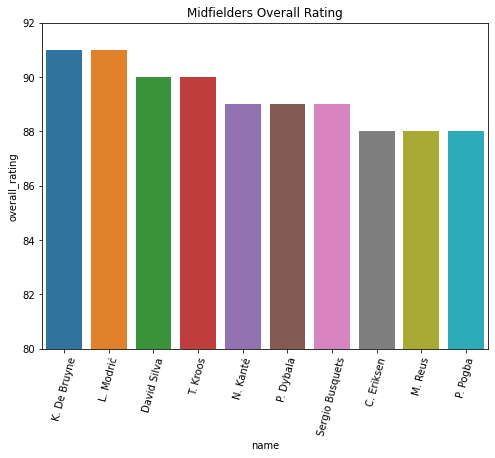

In [834]:
top_10_midfielders = midfielders_df.head(10)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.ylim(80,92)
plt.title("Midfielders Overall Rating")
sns.barplot(top_10_midfielders['name'], top_10_midfielders['overall_rating'])

Scatterplot Distribution by Rating, Age, Weight and Height


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Overall Rating vs Age vs Weight vs Height'}, xlabel='age', ylabel='overall_rating'>

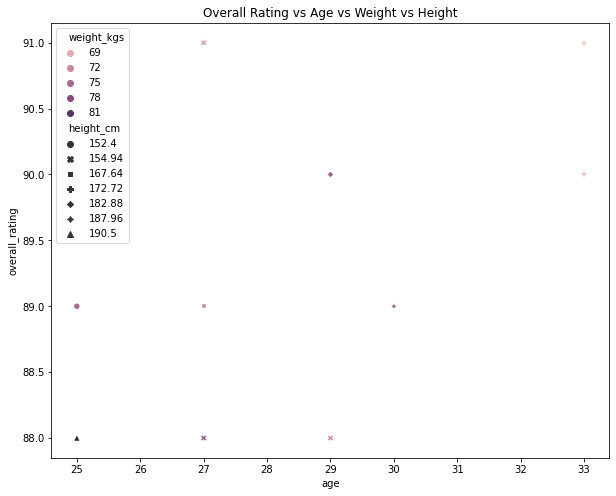

In [835]:
plt.figure(figsize=(10,8))
plt.title('Overall Rating vs Age vs Weight vs Height')

sns.scatterplot(top_10_midfielders.age, top_10_midfielders.overall_rating,top_10_midfielders.weight_kgs,top_10_midfielders.height_cm)

Forward positions

In [836]:
forwards_df = df[(df.positions == 'CF,RW,ST') |
                 (df.positions == 'ST,LW') |
                 (df.positions == 'LW,CAM') |
                 (df.positions == 'ST') |
                 (df.positions == 'LW,CF') |
                 (df.positions == 'RW,ST') |
                 (df.positions == 'CF,ST') |
                 (df.positions == 'LW,RW,CM') |
                 (df.positions == 'RW,ST,RM') |
                 (df.positions == 'RW,LW,ST') |
                 (df.positions == 'LW,ST') |
                 (df.positions == 'ST,LM') |
                 (df.positions == 'RW,LW') |
                 (df.positions == 'LW,RW,LM') |
                 (df.positions == 'CF,ST,CAM') |
                 (df.positions == 'RW,RM') |
                 (df.positions == 'LW,LM') |
                 (df.positions == 'LW,ST,LM') |
                 (df.positions == 'LW,RW') |
                 (df.positions == 'RW,CF') | 
                 (df.positions == 'RW,RM,CAM') |
                 (df.positions == 'CM,CDM,CAM') |
                 (df.positions == 'LW') |
                 (df.positions == 'CF,CAM')  
                        ]
                     

Top 10 Forwards by overall rating

In [837]:
top_10_forwards = forwards_df.head(10)
top_10_forwards

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,L. Messi,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,5,FC Barcelona,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187.96,83.0,"ST,LW",94,94,77000000.0,5,Juventus,...,85,95,28,31,23,7,11,15,14,11
2,Neymar Jr,27,175.26,68.0,"LW,CAM",92,92,108000000.0,5,Paris Saint-Germain,...,81,94,27,24,33,9,9,15,15,11
3,L. Suárez,32,182.88,86.2,ST,91,91,80000000.0,5,FC Barcelona,...,85,85,62,45,38,27,25,31,33,37
6,E. Hazard,28,172.72,76.2,"LW,CF",91,91,93000000.0,4,Chelsea,...,86,91,34,27,22,11,12,6,8,8
15,H. Kane,25,187.96,88.9,ST,90,92,96500000.0,3,Tottenham Hotspur,...,90,91,56,36,38,8,10,11,14,11
12,R. Lewandowski,30,182.88,79.8,ST,90,90,77000000.0,4,FC Bayern München,...,86,86,34,42,19,15,6,12,8,10
22,E. Cavani,32,185.42,77.1,ST,89,89,60000000.0,4,Paris Saint-Germain,...,85,82,52,45,39,12,5,13,13,10
20,S. Agüero,30,172.72,69.9,ST,89,89,64500000.0,4,Manchester City,...,83,90,30,20,12,13,15,6,11,14
23,A. Griezmann,27,175.26,73.0,"CF,ST",89,90,78000000.0,4,Atlético Madrid,...,83,89,59,54,48,14,8,14,13,14


Forwards overall rating graph


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Forwards Overall Rating'}, xlabel='name', ylabel='overall_rating'>

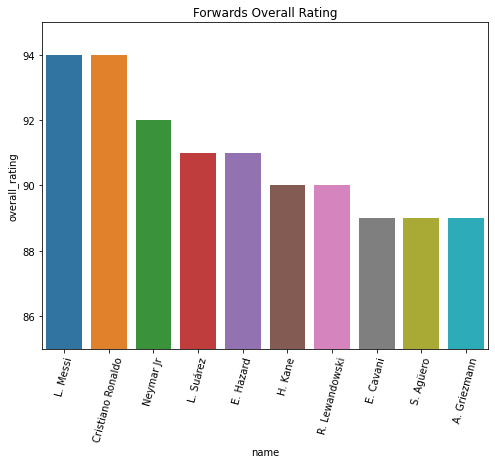

In [838]:
top_10_forwards = forwards_df.head(10)
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.ylim(85,95)
plt.title("Forwards Overall Rating")
sns.barplot(top_10_forwards['name'], top_10_forwards['overall_rating'])

Scatterplot Distribution by Rating, Age, Weight and Height


c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, style. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Overall Rating vs Age vs Weight vs Height'}, xlabel='age', ylabel='overall_rating'>

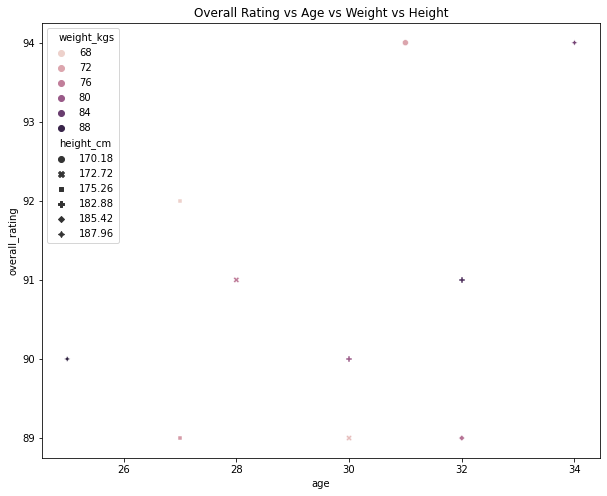

In [839]:
plt.figure(figsize=(10,8))
plt.title('Overall Rating vs Age vs Weight vs Height')

sns.scatterplot(top_10_forwards.age, top_10_forwards.overall_rating, top_10_forwards.weight_kgs, top_10_forwards.height_cm)

Describe top 5 players in 20 - 25 years old by overall rating

In [840]:
top_player_in_age_20_25 =df [(df.age == 20) |
                             (df.age == 21) |
                             (df.age == 22) |
                             (df.age == 23) |
                             (df.age == 24) |
                             (df.age == 25) ]
 
top_player_in_age_20_25.head(5)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
15,H. Kane,25,187.96,88.9,ST,90,92,96500000.0,3,Tottenham Hotspur,...,90,91,56,36,38,8,10,11,14,11
21,P. Dybala,25,152.40,74.8,"CAM,RW",89,94,89000000.0,3,Juventus,...,86,84,23,20,20,5,4,4,5,8
32,K. Mbappé,20,152.40,73.0,"RW,ST,RM",88,95,81000000.0,3,Paris Saint-Germain,...,70,86,34,34,32,13,5,7,11,6
36,P. Pogba,25,190.50,83.9,"CM,CAM",88,91,73000000.0,4,Manchester United,...,82,87,63,67,67,5,6,2,4,3
48,S. Umtiti,25,182.88,74.8,CB,87,92,57000000.0,3,FC Barcelona,...,61,82,90,89,86,15,10,14,12,15


Describe top 5 players in 26 - 30 years old by overall rating

In [841]:
top_player_in_age_26_30 =df [(df.age == 26) |
                             (df.age == 27) |
                             (df.age == 28) |
                             (df.age == 29) |
                             (df.age == 30) ]
                              
top_player_in_age_26_30.head(5)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
2,Neymar Jr,27,175.26,68.0,"LW,CAM",92,92,108000000.0,5,Paris Saint-Germain,...,81,94,27,24,33,9,9,15,15,11
7,De Gea,28,193.04,76.2,GK,91,93,72000000.0,4,Manchester United,...,40,70,25,21,13,90,85,85,89,94
6,E. Hazard,28,172.72,76.2,"LW,CF",91,91,93000000.0,4,Chelsea,...,86,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,27,154.94,69.9,"CAM,CM",91,92,102000000.0,4,Manchester City,...,79,90,68,58,51,15,13,5,10,13
12,R. Lewandowski,30,182.88,79.8,ST,90,90,77000000.0,4,FC Bayern München,...,86,86,34,42,19,15,6,12,8,10


Describe top 5 players in 31 - 36 years old by overall rating

In [842]:
top_player_in_age_31_36 =df [(df.age == 31) |
                             (df.age == 32) |
                             (df.age == 33) |
                             (df.age == 34) |
                             (df.age == 35) |
                             (df.age == 36) ]
                              
top_player_in_age_31_36.head(5)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
0,L. Messi,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,5,FC Barcelona,...,75,96,33,28,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187.96,83.0,"ST,LW",94,94,77000000.0,5,Juventus,...,85,95,28,31,23,7,11,15,14,11
3,L. Suárez,32,182.88,86.2,ST,91,91,80000000.0,5,FC Barcelona,...,85,85,62,45,38,27,25,31,33,37
4,L. Modrić,33,172.72,66.2,CM,91,91,67000000.0,4,Real Madrid,...,82,90,68,76,73,13,9,7,14,9
13,D. Godín,33,187.96,78.0,CB,90,90,44000000.0,3,Atlético Madrid,...,50,82,90,89,89,6,8,15,5,15


GK: Counter age graph & Age vs Overall Rating graph 

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age vs Overall Rating'}, xlabel='age', ylabel='overall_rating'>

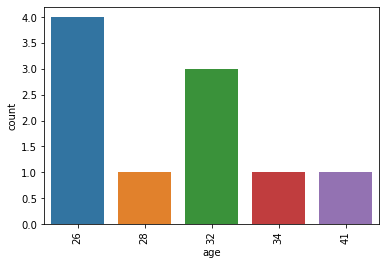

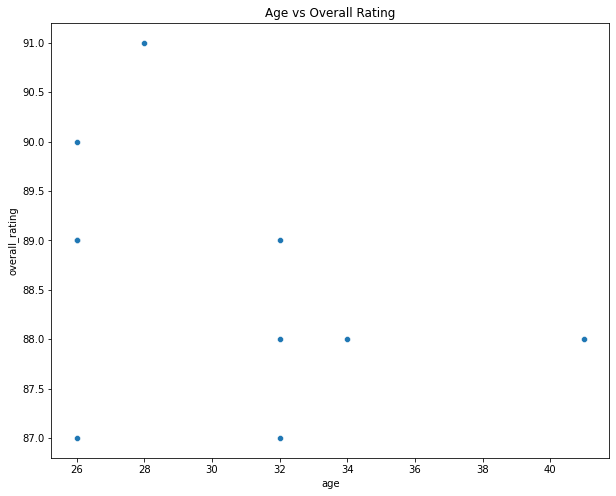

In [843]:
sns.countplot(x=top_10_gk.age)
plt.xticks(rotation=90)
plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')
sns.scatterplot(top_10_gk.age,top_10_gk.overall_rating)

Defenders: Counter age graph & Age vs Overall Rating graph 

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age vs Overall Rating'}, xlabel='age', ylabel='overall_rating'>

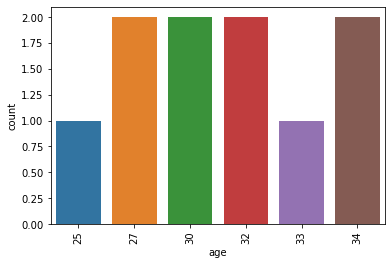

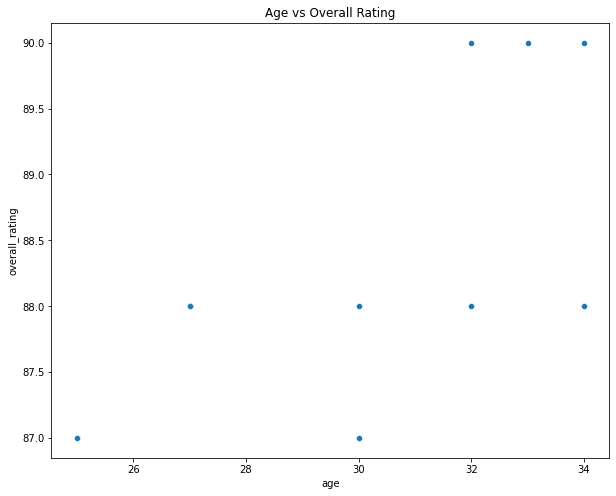

In [844]:
sns.countplot(x=top_10_defenders.age)
plt.xticks(rotation=90)
plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')
sns.scatterplot(top_10_defenders.age,top_10_defenders.overall_rating)

Midfielders: Counter age graph & Age vs Overall Rating graph 

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age vs Overall Rating'}, xlabel='age', ylabel='overall_rating'>

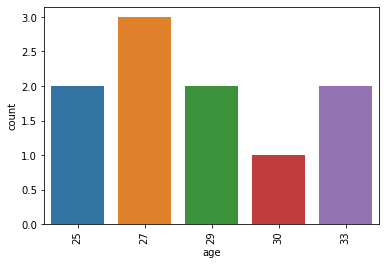

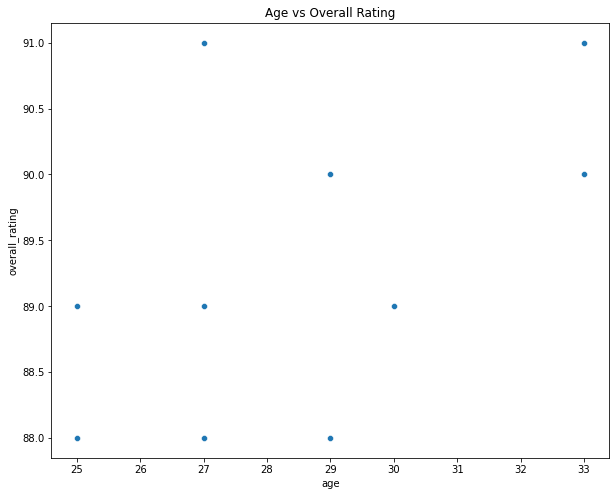

In [845]:
sns.countplot(x=top_10_midfielders.age)
plt.xticks(rotation=90)

plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')
sns.scatterplot(top_10_midfielders.age,top_10_midfielders.overall_rating)

Forwards: Counter age graph & Age vs Overall Rating graph 

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age vs Overall Rating'}, xlabel='age', ylabel='overall_rating'>

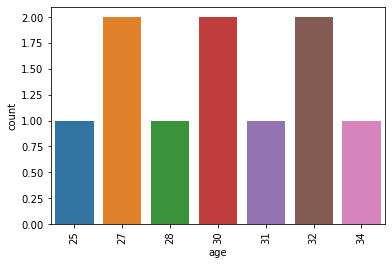

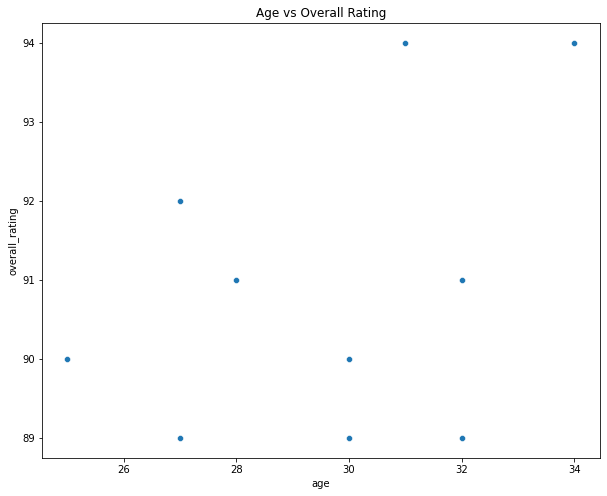

In [846]:
sns.countplot(x=top_10_forwards.age)
plt.xticks(rotation=90)

plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')
sns.scatterplot(top_10_forwards.age,top_10_forwards.overall_rating)

Machine Learning 

Data split (80% / 20%)

In [847]:
split = np.random.rand(len(df)) < 0.875
train = df[split]
test =  df[~split]

Training a LinearRegression model

In [848]:
regr = linear_model.LinearRegression()

In [849]:
best_players_x_train = train[['age','club_rating','potential']]
best_players_y_train = train[['overall_rating']]
poly = PolynomialFeatures(degree=4)
best_players_x_train_poly = poly.fit_transform(best_players_x_train)
regr.fit(best_players_x_train_poly, best_players_y_train)

LinearRegression()

Prediction

In [850]:
best_players_x_test = test[['age','club_rating','potential']]
best_players_y_test = test[['overall_rating']]
best_players_x_test_poly = poly.fit_transform(best_players_x_test)


In [851]:
df_best_players_pred = regr.predict(best_players_x_test_poly)


Evaluation with r2 score

In [852]:
r2_score(best_players_y_test, df_best_players_pred)

0.9120785478369127

Correlation graph

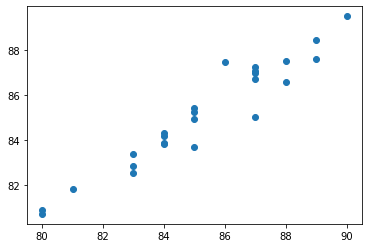

In [853]:

plt.scatter(best_players_y_test, df_best_players_pred)
plt.show()

Pearson Correlation Coefficient

In [854]:
import numpy.ma as ma
from scipy import stats

A = np.array(best_players_y_test)
B = np.array(df_best_players_pred)

a=ma.masked_invalid(A)
b=ma.masked_invalid(B)

msk = (~a.mask & ~b.mask)

pearson_coef, p_value = stats.pearsonr(a[msk], b[msk])
print("Pearson Correlation Coefficient: ", pearson_coef) 

Pearson Correlation Coefficient:  0.9602326146750378


Adding 'Predicted Rating' column to dataframe

In [855]:
best_players_x_test['Predicted Ratings'] = df_best_players_pred

C:\Users\yarin\AppData\Local\Temp/ipykernel_118696/74672339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_players_x_test['Predicted Ratings'] = df_best_players_pred


Sort players by 'Predicted Ratings' column (20% Data)

In [856]:
df_best_players2 = pd.merge(df,best_players_x_test)
df_best_players2.sort_values(by = 'Predicted Ratings',ascending=False).head(20)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Predicted Ratings
0,T. Kroos,29,182.88,76.2,CM,90,90,76500000.0,4,Real Madrid,...,88,72,74,66,10,11,13,7,10,89.498884
1,M. ter Stegen,26,187.96,84.8,GK,89,92,58000000.0,3,FC Barcelona,...,70,25,13,10,87,85,88,86,90,88.457741
2,M. Salah,26,175.26,71.2,"RW,ST",89,90,78500000.0,3,Liverpool,...,91,38,43,41,14,14,9,11,14,87.602163
5,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",88,89,69500000.0,3,Tottenham Hotspur,...,88,59,57,22,9,14,7,7,6,87.527781
12,W. Szczęsny,28,195.58,89.8,GK,86,88,37000000.0,3,Juventus,...,65,20,13,12,86,83,73,86,88,87.473989
3,T. Courtois,26,198.12,96.2,GK,89,90,53500000.0,4,Real Madrid,...,66,20,18,16,85,91,72,86,88,87.262677
4,Isco,26,175.26,78.9,"CAM,CM,LW",87,90,62500000.0,3,Real Madrid,...,86,60,64,51,10,8,12,15,6,87.262677
7,I. Rakitić,30,182.88,78.0,"CM,CDM",87,87,46500000.0,4,FC Barcelona,...,86,76,75,73,14,11,12,5,9,87.069308
8,Marcelo,30,175.26,79.8,LB,87,87,36500000.0,4,Real Madrid,...,86,71,82,83,12,5,5,5,9,87.069308
10,K. Navas,32,185.42,79.8,GK,87,87,30500000.0,3,Real Madrid,...,67,28,14,14,90,81,75,82,90,86.984144


In [857]:
df_best_players_pred2 = regr.predict(best_players_x_train_poly)
best_players_x_train['Predicted Ratings'] = df_best_players_pred2

C:\Users\yarin\AppData\Local\Temp/ipykernel_118696/3608452585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_players_x_train['Predicted Ratings'] = df_best_players_pred2


Sort players by 'Predicted Ratings' column (80% Data)

In [858]:
df_best_players3 = pd.merge(df,best_players_x_train)
df_best_players3.sort_values(by = 'Predicted Ratings',ascending=False)
df_best_players3.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

Merge the dataframes(20% & 80%) and sort players by 'Predicted Ratings'

In [859]:
df_best_rating = df_best_players2.append(df_best_players3, ignore_index=True).sort_values(by = 'Predicted Ratings',ascending=False)
df_best_rating.drop_duplicates()
df_best_rating.head(20)

,name,age,height_cm,weight_kgs,positions,overall_rating,potential,value_euro,international_reputation(1-5),club_team,...,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,Predicted Ratings
34,Cristiano Ronaldo,34,187.96,83.0,"ST,LW",94,94,77000000.0,5,Juventus,...,95,28,31,23,7,11,15,14,11,94.055348
33,L. Messi,31,170.18,72.1,"CF,RW,ST",94,94,110500000.0,5,FC Barcelona,...,96,33,28,26,6,11,15,14,8,94.001990
36,L. Suárez,32,182.88,86.2,ST,91,91,80000000.0,5,FC Barcelona,...,85,62,45,38,27,25,31,33,37,91.111238
40,L. Modrić,33,172.72,66.2,CM,91,91,67000000.0,4,Real Madrid,...,90,68,76,73,13,9,7,14,9,90.982254
37,De Gea,28,193.04,76.2,GK,91,93,72000000.0,4,Manchester United,...,70,25,21,13,90,85,85,89,94,90.954437
35,Neymar Jr,27,175.26,68.0,"LW,CAM",92,92,108000000.0,5,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,90.634257
38,E. Hazard,28,172.72,76.2,"LW,CF",91,91,93000000.0,4,Chelsea,...,91,34,27,22,11,12,6,8,8,90.492691
47,J. Oblak,26,187.96,87.1,GK,90,93,68000000.0,3,Atlético Madrid,...,70,27,12,18,86,92,78,88,89,90.465712
39,K. De Bruyne,27,154.94,69.9,"CAM,CM",91,92,102000000.0,4,Manchester City,...,90,68,58,51,15,13,5,10,13,90.315552
45,R. Lewandowski,30,182.88,79.8,ST,90,90,77000000.0,4,FC Bayern München,...,86,34,42,19,15,6,12,8,10,90.253930


Dataframes after prediction

Top 5 GK

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'GK Score')

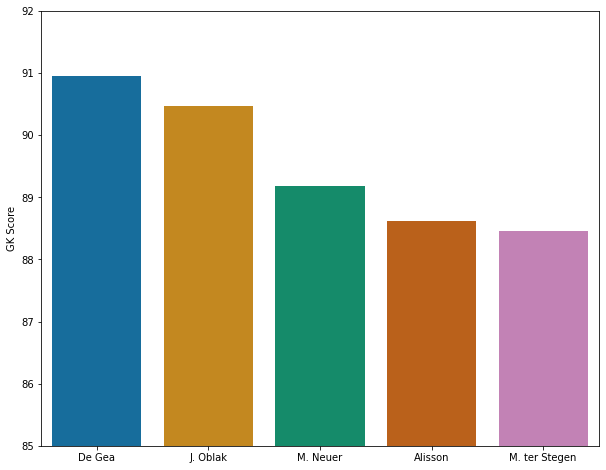

In [860]:
plt.figure(figsize=(10,8))
s1 =df_best_rating[(df_best_rating.positions == 'GK')].sort_values('Predicted Ratings', ascending=False)[:5]
x1 = np.array(list(s1['name']))
y1 = np.array(list(s1['Predicted Ratings']))
plt.ylim(85,92)
sns.barplot(x1, y1, palette=sns.color_palette("colorblind"))
plt.ylabel("GK Score")

GK player picture

In [861]:
top_player_gk = s1.iloc[0]['name']
if top_player_gk == 'De Gea':
    myImage1 = Image.open("data/GK/De Gea.jpeg")
elif top_player_gk == 'J. Oblak':
    myImage1 = Image.open("data/GK/Oblak.jpeg")
elif top_player_gk == 'M. ter Stegen':
    myImage1 = Image.open("data/GK/Ter Stegen.jpeg")
elif top_player_gk == 'Alisson':
    myImage1 = Image.open("data/GK/Alisson.jpeg")
elif top_player_gk == 'M. Neuer':
    myImage1 = Image.open("data/GK/Neuer.jpeg")
myImage1.thumbnail((200,200))


Top 5 LB

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'LB Score')

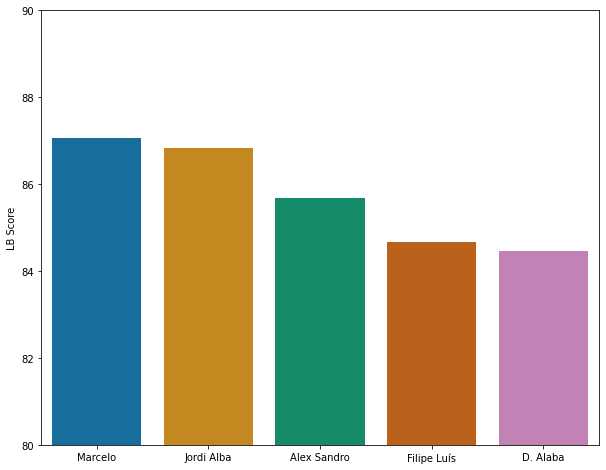

In [862]:
plt.figure(figsize=(10,8))
s2 =df_best_rating[(df_best_rating.positions == 'LB')|(df_best_rating.positions == 'LB,LM')|(df_best_rating.positions == 'LB,CB') |(df_best_rating.positions == 'LB,LWB')].sort_values('Predicted Ratings', ascending=False)[:7]
x2 = np.array(list(s2['name']))
y2 = np.array(list(s2['Predicted Ratings']))
plt.ylim(80,90)
sns.barplot(x2, y2, palette=sns.color_palette("colorblind"))
plt.ylabel("LB Score")

LB player picture 

In [863]:
top_player_lb = s2.iloc[0]['name']
if top_player_lb == 'Marcelo':
    myImage2 = Image.open("data/LB/Marcelo.jpeg")
elif top_player_lb == 'Jordi Alba':
    myImage2 = Image.open("data/LB/Alaba.jpeg")
elif top_player_lb  == 'Alex Sandro':
    myImage2 = Image.open("data/LB/Alex Sandro.jpeg")
elif top_player_lb  == 'D. Alaba':
    myImage2 = Image.open("data/LB/Alaba.jpeg")
elif top_player_lb  == 'Filipe Luís':
    myImage2 = Image.open("data/LB/Filipe Luís.jpeg")
myImage2.thumbnail((200,200))


Top 5 RB

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Score')

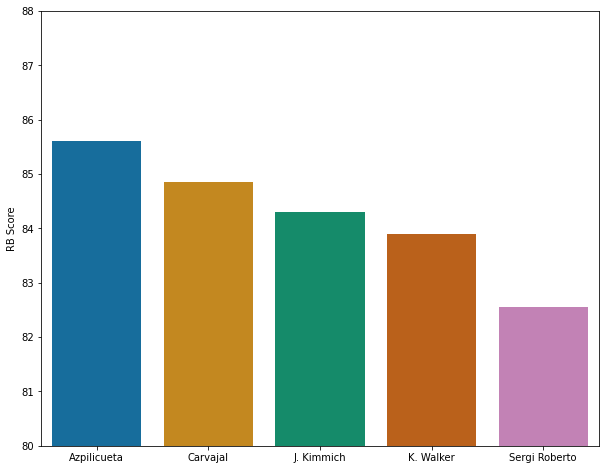

In [864]:
plt.figure(figsize=(10,8))
s3 = df_best_rating[(df_best_rating.positions == 'RB,CB')|(df_best_rating.positions == 'RB,CM,CDM')|
                  (df_best_rating.positions == 'RB')|
                  (df_best_rating.positions == 'RB,RM,CM')|
                  (df_best_rating.positions == 'RB,RW,LW') |
                  (df_best_rating.positions == 'RB,CM')|(df_best_rating.positions == 'RB,RWB')].sort_values('Predicted Ratings', ascending=False)[:7]
x3 = np.array(list(s3['name']))
y3 = np.array(list(s3['Predicted Ratings']))
plt.ylim(80,88)
sns.barplot(x3, y3, palette=sns.color_palette("colorblind"))
plt.ylabel("RB Score")


RB player picture

In [865]:
top_player_rb = s3.iloc[0]['name']
if top_player_rb == 'Azpilicueta':
    myImage3 = Image.open("data/RB/Azpilicueta.jpeg")
elif top_player_rb == 'Carvajal':
    myImage3 = Image.open("data/RB/Carvajal.jpeg")
elif top_player_rb  == 'J. Kimmich':
    myImage3 = Image.open("data/RB/Kimmich.jpeg")
elif top_player_rb  == 'K. Walker':
    myImage3 = Image.open("data/RB/Walker.jpeg")
elif top_player_rb  == 'Sergi Roberto':
    myImage3 = Image.open("data/RB/Sergi.jpeg")
myImage3.thumbnail((200,200))


Top 5 CB

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'CB Score')

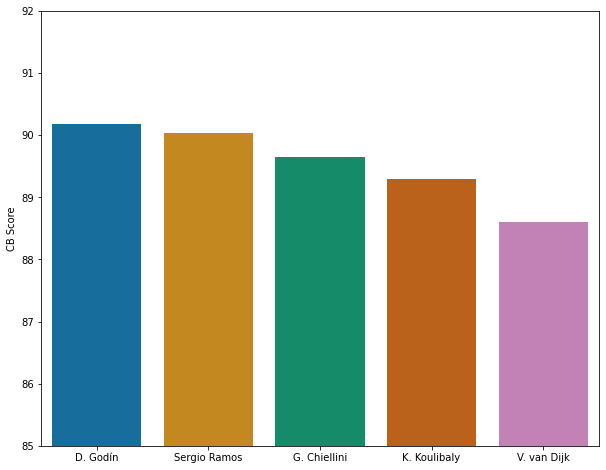

In [866]:
plt.figure(figsize=(10,8))
s4 = df_best_rating[(df_best_rating.positions == 'CB') | (df_best_rating.positions == 'CB,CDM')].sort_values('Predicted Ratings', ascending=False)[:5]
x4 = np.array(list(s4['name']))
y4 = np.array(list(s4['Predicted Ratings']))
plt.ylim(85,92)
sns.barplot(x4, y4, palette=sns.color_palette("colorblind"))
plt.ylabel("CB Score")

CB player picture

In [867]:
top_player_cb1 = s4.iloc[0]['name']
if top_player_cb1 == 'D. Godín':
    myImage4 = Image.open("data/CB/Godin.jpeg")
elif top_player_cb1 == 'Sergio Ramos':
    myImage4 = Image.open("data/CB/Sergio Ramos.jpeg")
elif top_player_cb1  == 'G. Chiellini':
    myImage4 = Image.open("data/CB/Chiellini.jpeg")
elif top_player_cb1  == 'K. Koulibaly':
    myImage4 = Image.open("data/CB/Koulibaly.jpeg")
elif top_player_cb1  == 'V. van Dijk':
    myImage4 = Image.open("data/CB/Van Dijk.jpeg")
myImage4.thumbnail((200,200))


In [868]:
top_player_cb2 = s4.iloc[1]['name']
if top_player_cb2 == 'D. Godín':
    myImage5 = Image.open("data/CB/Godin.jpeg")
elif top_player_cb2 == 'Sergio Ramos':
    myImage5 = Image.open("data/CB/Sergio Ramos.jpeg")
elif top_player_cb2  == 'G. Chiellini':
    myImage5 = Image.open("data/CB/Chiellini.jpeg")
elif top_player_cb2  == 'K. Koulibaly':
    myImage5 = Image.open("data/CB/Koulibaly.jpeg")
elif top_player_cb2  == 'V. van Dijk':
    myImage5 = Image.open("data/CB/Van Dijk.jpeg")
myImage5.thumbnail((200,200))


Top 5 LM

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'LM Score')

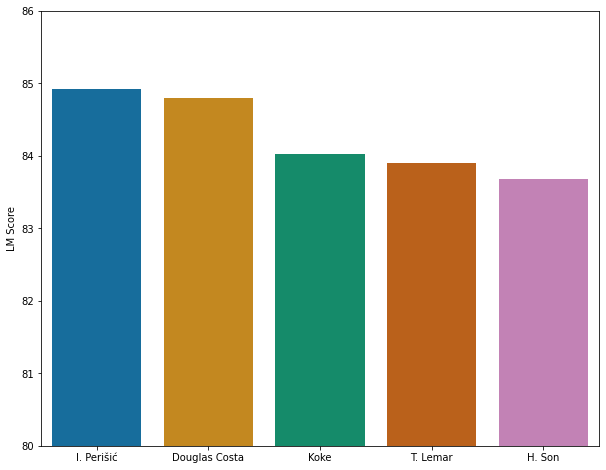

In [869]:
plt.figure(figsize=(10,8))
 
s5 = df_best_rating[(df_best_rating.positions == 'LM,ST')|(df_best_rating.positions == 'LM,RW,LW')|(df_best_rating.positions == 'LM')|(df_best_rating.positions == 'LM,CM,RM') |
                    (df_best_rating.positions == 'LM,LW')|(df_best_rating.positions == 'LM,CAM,RM')|(df_best_rating.positions == 'LM,LB,CM') ].sort_values('Predicted Ratings', ascending=False)[:8]
x5 = np.array(list(s5['name']))
y5 = np.array(list(s5['Predicted Ratings']))
plt.ylim(80,86)
sns.barplot(x5, y5, palette=sns.color_palette("colorblind"))
plt.ylabel("LM Score")

LM player picture

In [870]:
top_player_lm = s5.iloc[0]['name']
if top_player_lm == 'Douglas Costa':
    myImage6 = Image.open("data/LM/Costa.jpeg")
elif top_player_lm == 'I. Perišić':
    myImage6 = Image.open("data/LM/Perisic.jpeg")
elif top_player_lm  == 'Koke':
    myImage6 = Image.open("data/LM/Koke.jpeg")
elif top_player_lm  == 'T. Lemar':
    myImage6 = Image.open("data/LM/Lemar.jpeg")
elif top_player_lm  == 'H. Son':
    myImage6 = Image.open("data/LM/Son.jpeg")
myImage6.thumbnail((200,200))


Top 5 RM

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RM Score')

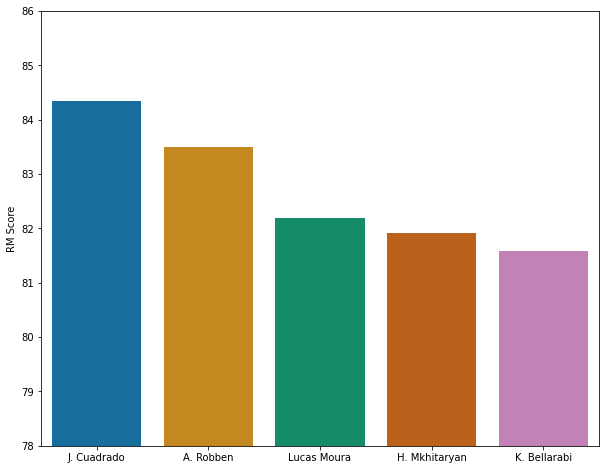

In [871]:
plt.figure(figsize=(10,8))
 
s6 = df_best_rating[(df_best_rating.positions == 'RM,RW,CAM')|(df_best_rating.positions == 'RM')|(df_best_rating.positions == 'RM,RW')|(df_best_rating.positions == 'RM,LM,ST')
       ].sort_values('Predicted Ratings', ascending=False)[:6]
x6 = np.array(list(s6['name']))
y6 = np.array(list(s6['Predicted Ratings']))
plt.ylim(78,86)
sns.barplot(x6, y6, palette=sns.color_palette("colorblind"))
plt.ylabel("RM Score")

RM player picture

In [872]:
top_player_rm = s6.iloc[0]['name']
if top_player_rm == 'J. Cuadrado':
    myImage7 = Image.open("data/RM/Cuadrado.jpeg")
elif top_player_rm == 'A. Robben':
    myImage7 = Image.open("data/RM/Robben.jpeg")
elif top_player_rm  == 'Lucas Moura':
    myImage7 = Image.open("data/RM/Lucas Moura.jpeg")
elif top_player_rm  == 'H. Mkhitaryan':
    myImage7 = Image.open("data/RM/Mikhitaryan.jpeg")
elif top_player_rm  == 'K. Bellarabi':
    myImage7 = Image.open("data/RM/Bellarabi.jpeg")
myImage7.thumbnail((200,200))


Top 5 CM

C:\Users\yarin\AppData\Local\Temp/ipykernel_118696/2504371851.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s7 = df_best_rating[(df_best_rating.positions == 'CAM,CM')|(df_best_rating.positions == 'CM')|(df.positions == 'CDM,CM')|(df_best_rating.positions == 'CAM,RW')|
c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'CM Score')

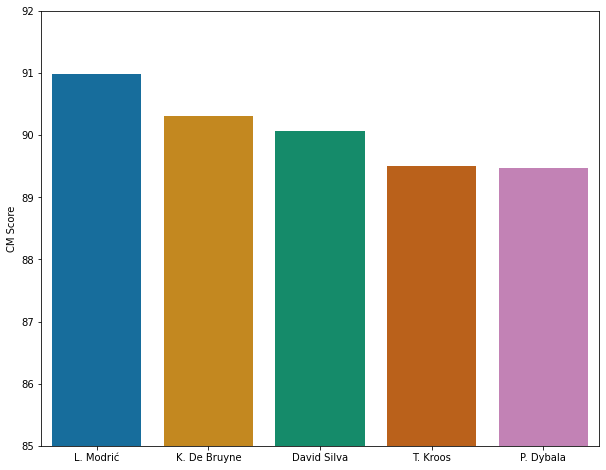

In [873]:
plt.figure(figsize=(10,8))
 
s7 = df_best_rating[(df_best_rating.positions == 'CAM,CM')|(df_best_rating.positions == 'CM')|(df.positions == 'CDM,CM')|(df_best_rating.positions == 'CAM,RW')|
        (df_best_rating.positions == 'CAM,RM,CM')|(df_best_rating.positions == 'CAM,LM,ST')|(df_best_rating.positions == 'CM,CAM')|(df_best_rating.positions == 'CDM')|
        (df_best_rating.positions == 'CAM,CM,RM')|(df_best_rating.positions == 'CM,CDM')|(df_best_rating.positions == 'CM,CAM,CDM')|(df_best_rating.positions == 'CAM,CM,LW')|
        (df_best_rating.positions == 'CAM,RM,RW,CF')|(df_best_rating.positions == 'CAM')|(df_best_rating.positions == 'CM,LM,RM')|(df.positions == 'CM,LW,LM,CAM') |
        (df_best_rating.positions == 'CDM,CB') | (df_best_rating.positions == 'CDM,RB,CM') | (df_best_rating.positions == 'CM,LW') |(df_best_rating.positions == 'CM,LM')|
        (df_best_rating.positions == 'CM,LW,RW')|(df.positions == 'CAM,LW,CM,RM')|(df_best_rating.positions == 'CAM,CDM')|
        (df_best_rating.positions == 'CM,ST,CAM,CF')].sort_values('Predicted Ratings', ascending=False)[:5]
x7 = np.array(list(s7['name']))
y7 = np.array(list(s7['Predicted Ratings']))
plt.ylim(85,92)
sns.barplot(x7, y7, palette=sns.color_palette("colorblind"))
plt.ylabel("CM Score")


CM player picture

In [874]:
top_player_cm = s7.iloc[0]['name']
if top_player_cm == 'P. Dybala':
    myImage8 = Image.open("data/CM/Dybala.jpeg")
elif top_player_cm == 'L. Modrić':
    myImage8 = Image.open("data/CM/Modric.jpeg")
elif top_player_cm  == 'K. De Bruyne':
    myImage8 = Image.open("data/CM/De Bruyne.jpeg")
elif top_player_cm  == 'David Silva':
    myImage8 = Image.open("data/CM/David Silva.jpeg")
elif top_player_cm  == 'T. Kroos':
    myImage8 = Image.open("data/CM/Kroos.jpeg")
myImage8.thumbnail((200,200))


Top 5 LW

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'LW Score')

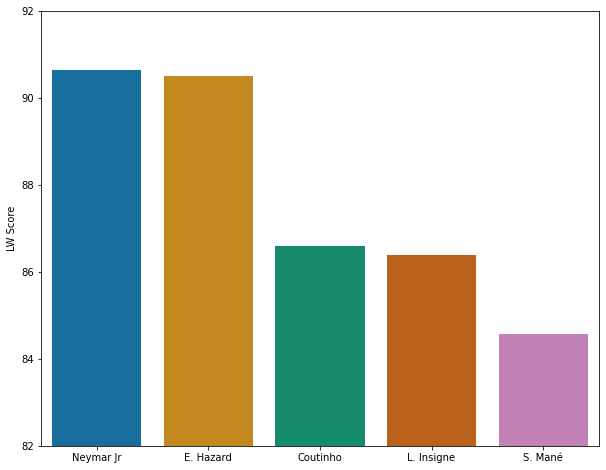

In [875]:
plt.figure(figsize=(10,8))
 
s8 = df_best_rating[(df_best_rating.positions == 'LW,CAM') |
                 (df_best_rating.positions == 'LW,CF') |
                 (df_best_rating.positions == 'LW,RW,CM') |
                 (df_best_rating.positions == 'LW,ST') |
                 (df_best_rating.positions == 'LW,RW,LM') |
                 (df_best_rating.positions == 'LW,LM') |
                 (df_best_rating.positions == 'LW,ST,LM') |
                 (df_best_rating.positions == 'LW,RW') |
                 (df_best_rating.positions == 'LW')].sort_values('Predicted Ratings', ascending=False)[:5]
x8 = np.array(list(s8['name']))
y8 = np.array(list(s8['Predicted Ratings']))
plt.ylim(82,92)
sns.barplot(x8, y8, palette=sns.color_palette("colorblind"))
plt.ylabel("LW Score")

LW player picture

In [876]:
top_player_lw = s8.iloc[0]['name']
if top_player_lw == 'Neymar Jr':
    myImage9 = Image.open("data/LW/Nyemar.jpeg")
elif top_player_lw == 'E. Hazard':
    myImage9 = Image.open("data/LW/Hazard.jpeg")
elif top_player_lw  == 'Coutinho':
    myImage9 = Image.open("data/LW/Coutinho.jpeg")
elif top_player_lw  == 'L. Insigne':
    myImage9 = Image.open("data/LW/Insigne.jpeg")
elif top_player_lw  == 'A. Martial':
    myImage9 = Image.open("data/LW/Martial.jpeg")
myImage9.thumbnail((200,200))


Top 5 RW

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RW Score')

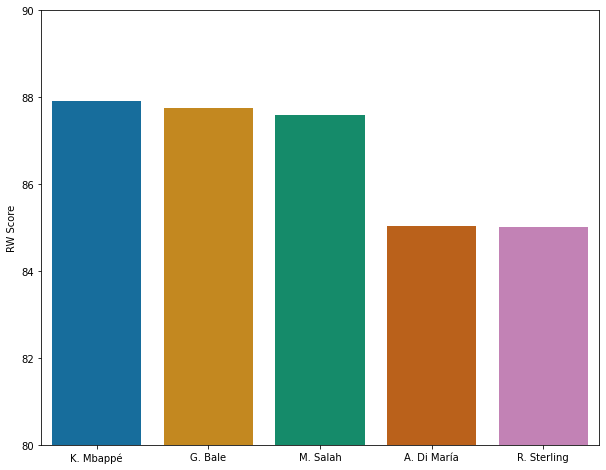

In [877]:

plt.figure(figsize=(10,8))
 
s9 = df_best_rating[(df_best_rating.positions == 'RW,ST') |
                 (df_best_rating.positions == 'RW,ST,RM') |
                 (df_best_rating.positions == 'RW,LW,ST') |
                 (df_best_rating.positions == 'RW,LW') |
                 (df_best_rating.positions == 'RW,RM') |
                 (df_best_rating.positions == 'RW,CF') | 
                 (df_best_rating.positions == 'RW,RM,CAM')].sort_values('Predicted Ratings', ascending=False)[:5]
x9 = np.array(list(s9['name']))
y9 = np.array(list(s9['Predicted Ratings']))
plt.ylim(80,90)
sns.barplot(x9, y9, palette=sns.color_palette("colorblind"))
plt.ylabel("RW Score")

RW player picture

In [878]:
top_player_rw = s9.iloc[0]['name']
if top_player_rw == 'K. Mbappé':
    myImage10 = Image.open("data/RW/K.Mbappe.jpeg")
elif top_player_rw == 'G. Bale':
    myImage10 = Image.open("data/RW/Gareth Bale.jpg")
elif top_player_rw  == 'M. Salah':
    myImage10 = Image.open("data/RW/Mohamed Salah.jpg")
elif top_player_rw  == 'A. Di Maria':
    myImage10 = Image.open("data/RW/Di Maria.jpg")
elif top_player_rw  == 'R. Sterling':
    myImage10 = Image.open("data/RW/Raheem Sterling.jpg")
myImage10.thumbnail((200,200))


Top 5 CF

c:\Users\yarin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'CF Score')

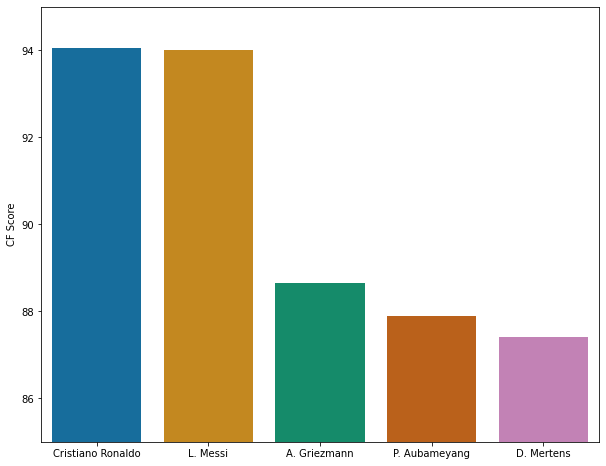

In [879]:
plt.figure(figsize=(10,8))
 
s10 = df_best_rating[(df_best_rating.positions == 'CF,RW,ST') |
                 (df_best_rating.positions == 'ST,LW') |
                 (df_best_rating.positions == 'CF,ST') |
                 (df_best_rating.positions == 'ST,LM') |
                 (df_best_rating.positions == 'CF,ST,CAM') |
                 (df_best_rating.positions == 'CF,CAM')].sort_values('Predicted Ratings', ascending=False)[:5]
x10 = np.array(list(s10['name']))
y10 = np.array(list(s10['Predicted Ratings']))
plt.ylim(85,95)
sns.barplot(x10, y10, palette=sns.color_palette("colorblind"))
plt.ylabel("CF Score")

CF player picture

In [880]:
top_player_cf = s10.iloc[0]['name']
if top_player_cf == 'Cristiano Ronaldo':
    myImage11 = Image.open("data/CF/Cristiano Ronaldo.jpeg")
elif top_player_cf == 'L. Messi':
    myImage11 = Image.open("data/CF/L.Messi.jpeg")
elif top_player_cf  == 'A. Griezmann':
    myImage11 = Image.open("data/CF/Griezmann.jpeg")
elif top_player_cf  == 'P. Aubameyang':
    myImage11 = Image.open("data/CF/Aubameyang.jpeg")
elif top_player_cf  == 'D. Mertens':
    myImage11 = Image.open("data/CF/Mertens.jpeg")
myImage11.thumbnail((200,200))


### THE SQUAD OF THE YEAR! 

GK: De Gea


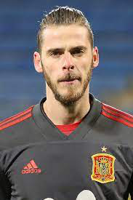

In [881]:
print("GK:",top_player_gk)
myImage1

LB: Marcelo


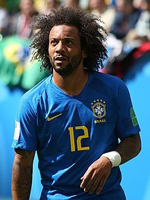

In [882]:
print("LB:",top_player_lb)
myImage2

CB: D. Godín


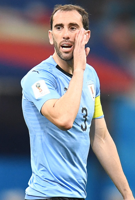

In [883]:
print("CB:",top_player_cb1)
myImage4 



CB: Sergio Ramos


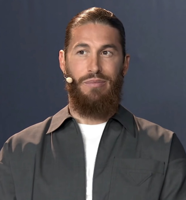

In [884]:
print("CB:",top_player_cb2)
myImage5

RB: Azpilicueta


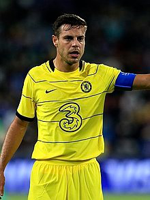

In [885]:
print("RB:",top_player_rb)
myImage3

LM: I. Perišić


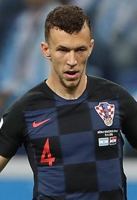

In [886]:
print("LM:",top_player_lm)
myImage6

CM: L. Modrić


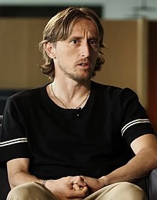

In [887]:
print("CM:",top_player_cm)
myImage8

RM: J. Cuadrado


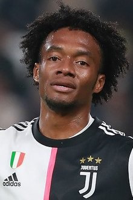

In [888]:
print("RM:",top_player_rm)
myImage7

LW: Neymar Jr


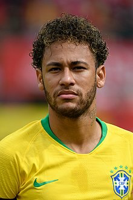

In [889]:
print("LW:",top_player_lw)
myImage9

RW: K. Mbappé


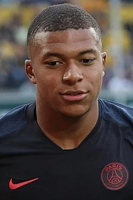

In [890]:
print("RW:",top_player_rw)
myImage10

CF: Cristiano Ronaldo


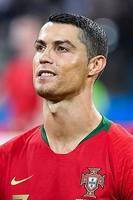

In [891]:
print("CF:",top_player_cf)
myImage11

Squad of the year average age

In [892]:
age_list_top_squad=[]
age_list_top_squad = [s1.iloc[0]['age'],s2.iloc[0]['age'],s3.iloc[0]['age'],s4.iloc[0]['age'],s4.iloc[1]['age'],s5.iloc[0]['age'],
            s6.iloc[0]['age'],s7.iloc[0]['age'],s8.iloc[0]['age'],s9.iloc[0]['age'],s10.iloc[0]['age']]
average_age_top_squad= sum(age_list_top_squad) / len (age_list_top_squad)
print("The average of the best plyears in fifa squad is: ",round(average_age_top_squad,2))

The average of the best plyears in fifa squad is:  29.64


In [893]:
pre_rating_list_top_squad=[]
pre_rating_list_top_squad = [s1.iloc[0]['Predicted Ratings'],s2.iloc[0]['Predicted Ratings'],s3.iloc[0]['Predicted Ratings'],s4.iloc[0]['Predicted Ratings'],s4.iloc[1]['Predicted Ratings'],
                             s5.iloc[0]['Predicted Ratings'],s6.iloc[0]['Predicted Ratings'],s7.iloc[0]['Predicted Ratings'],s8.iloc[0]['Predicted Ratings'],
                             s9.iloc[0]['Predicted Ratings'],s10.iloc[0]['Predicted Ratings']]

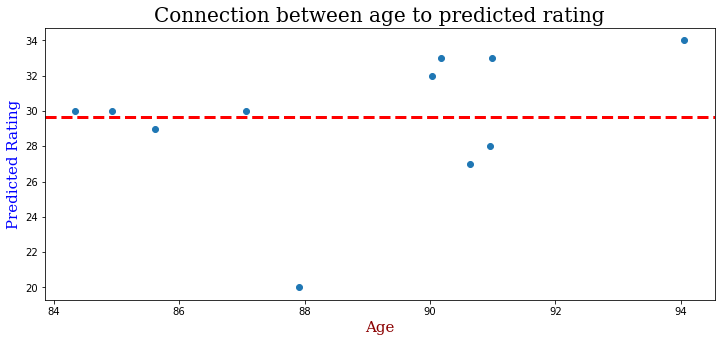

In [894]:
plt.figure(figsize=(12,5))
plt.scatter(pre_rating_list_top_squad,age_list_top_squad)
font1 = {'family':'serif','color':'blue','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
font3 = {'family':'serif','color':'black','size':20}
plt.title("Connection between age to predicted rating",fontdict=font3)
plt.xlabel('Age',fontdict=font2)
plt.ylabel('Predicted Rating',fontdict=font1)
plt.axhline(average_age_top_squad, color='red', linestyle='--', linewidth=3)